In [73]:
import tensorflow as tf
# tf.__version__

In [74]:
import zipfile,os
 
base_dir = '../input/4-animal-classification/'
train_dir = os.path.join(base_dir, 'train')

In [75]:
os.listdir('../input/4-animal-classification/train')

['horse', 'dog', 'cat', 'deer']

In [76]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
image_datagen = ImageDataGenerator(
#                     rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split = 0.2,
                    width_shift_range=0.1,
                    height_shift_range=0.1,)

# Rescale kalo resolusi gambar seragam
# Ga perlu rescale kalo resolusi beda-beda

train_generator = image_datagen.flow_from_directory(
        train_dir,
        subset='training',
        target_size=(300, 300),
        batch_size=32,
        class_mode='categorical'
        )

validation_generator = image_datagen.flow_from_directory(
        train_dir,
        subset='validation',
        target_size=(300, 300),
        batch_size=32,
        class_mode='categorical'
        )

Found 2240 images belonging to 4 classes.
Found 560 images belonging to 4 classes.


In [6]:
model = tf.keras.models.Sequential([
    # Input
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Blok 1
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Blok 2
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
image_datagen = ImageDataGenerator(
#                     rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split = 0.2,
                    width_shift_range=0.1,
                    height_shift_range=0.1,)

# Rescale kalo resolusi gambar seragam
# Ga perlu rescale kalo resolusi beda-beda

train_generator = image_datagen.flow_from_directory(
        train_dir,
        subset='training',
        target_size=(300, 300),
        batch_size=32,
        class_mode='categorical'
        )

validation_generator = image_datagen.flow_from_directory(
        train_dir,
        subset='validation',
        target_size=(300, 300),
        batch_size=32,
        class_mode='categorical'
        )MaxPooling2D(2,2),

    # Blok 3
    tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Blok 3
    tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.GlobalAveragePooling2D(),

    #Flatten
    tf.keras.layers.Flatten(),
    
    # Fully
    tf.keras.layers.Dense(256, activation='relu'),
    # tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    
    # 4 classes
    tf.keras.layers.Dense(4, activation='softmax')
])

model.summary()

2022-09-20 05:38:03.862971: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero

2022-09-20 05:38:03.959174: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero

2022-09-20 05:38:03.959981: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero

2022-09-20 05:38:03.961594: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA

To enable them in other operations, rebuild TensorFlow with the appropriate co

Model: "sequential"

_________________________________________________________________

Layer (type)                 Output Shape              Param #   


conv2d (Conv2D)              (None, 222, 222, 64)      1792      

_________________________________________________________________

max_pooling2d (MaxPooling2D) (None, 111, 111, 64)      0         

_________________________________________________________________

conv2d_1 (Conv2D)            (None, 109, 109, 128)     73856     

_________________________________________________________________

max_pooling2d_1 (MaxPooling2 (None, 54, 54, 128)       0         

_________________________________________________________________

conv2d_2 (Conv2D)            (None, 52, 52, 256)       295168    

_________________________________________________________________

max_pooling2d_2 (MaxPooling2 (None, 26, 26, 256)       0         

_________________________________________________________________

conv2d_3 (Conv2D)            (None, 24, 

2022-09-20 05:38:03.961892: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero

2022-09-20 05:38:03.962792: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero

2022-09-20 05:38:03.963668: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero

2022-09-20 05:38:06.114370: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero

2022-09-20 05:38:06.115229: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read fr

In [77]:
from tensorflow.keras.layers import Input , Dense , Flatten , GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

transfer = tf.keras.applications.efficientnet.EfficientNetB3(
              input_shape=(300,300,3),
              include_top=False,
              weights='imagenet'
)

# Include Top
# Kalo True -> Fully Connected Layer bawaan (Output Layer)
# Kalo False -> Fully Connected Layer bisa di modifikasi (Output Layer)

model = tf.keras.models.Sequential([
    transfer,
    tf.keras.layers.GlobalAveragePooling2D(),

    #Flatten
    tf.keras.layers.Flatten(),
    
    # Fully
    tf.keras.layers.Dense(1280, activation='relu'),
#     tf.keras.layers.Dense(512, activation='relu'),
    # tf.keras.layers.Dense(256, activation='relu'),
    # tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    # tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dense(32, activation='relu'),
    # tf.keras.layers.Dense(16, activation='relu'),
#     tf.keras.layers.Dense(8, activation='relu'),
    
    # 4 classes
    tf.keras.layers.Dense(4, activation='softmax')
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb1 (Functional)  (None, 8, 8, 1280)        6575239   
_________________________________________________________________
global_average_pooling2d_5 ( (None, 1280)              0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1280)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 1280)              1639680   
_________________________________________________________________
dense_19 (Dense)             (None, 128)               163968    
_________________________________________________________________
dense_20 (Dense)             (None, 4)                 516       
Total params: 8,379,403
Trainable params: 8,317,348
Non-trainable params: 62,055
_______________________________________

In [78]:
# compile model dengan 'adam' optimizer loss function 'categorical_crossentropy' 
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0010, momentum=0.9), 
            loss='categorical_crossentropy',
            metrics = ['accuracy'])

In [79]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')

checkpoint = ModelCheckpoint("checkpoints/best.h5", monitor='val_accuracy', verbose=1, save_best_only=True)

In [80]:
# latih model dengan model.fit 
history = model.fit(
      train_generator,                    
      epochs=20,                              # tambahkan epochs jika akurasi model belum optimal
      validation_data=validation_generator,   # menampilkan akurasi pengujian data validasi
      callbacks = [early, checkpoint],
      verbose=2
)

Epoch 1/10
70/70 - 73s - loss: 1.2322 - accuracy: 0.5348 - val_loss: 0.8902 - val_accuracy: 0.8661

Epoch 00001: val_accuracy improved from -inf to 0.86607, saving model to checkpoints/best.h5


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/10
70/70 - 61s - loss: 0.7444 - accuracy: 0.8455 - val_loss: 0.4380 - val_accuracy: 0.9179

Epoch 00002: val_accuracy improved from 0.86607 to 0.91786, saving model to checkpoints/best.h5
Epoch 3/10
70/70 - 60s - loss: 0.4189 - accuracy: 0.8991 - val_loss: 0.2567 - val_accuracy: 0.9446

Epoch 00003: val_accuracy improved from 0.91786 to 0.94464, saving model to checkpoints/best.h5
Epoch 4/10
70/70 - 60s - loss: 0.2737 - accuracy: 0.9246 - val_loss: 0.2036 - val_accuracy: 0.9482

Epoch 00004: val_accuracy improved from 0.94464 to 0.94821, saving model to checkpoints/best.h5
Epoch 5/10
70/70 - 60s - loss: 0.2017 - accuracy: 0.9455 - val_loss: 0.1760 - val_accuracy: 0.9518

Epoch 00005: val_accuracy improved from 0.94821 to 0.95179, saving model to checkpoints/best.h5
Epoch 6/10
70/70 - 60s - loss: 0.1627 - accuracy: 0.9504 - val_loss: 0.1684 - val_accuracy: 0.9482

Epoch 00006: val_accuracy did not improve from 0.95179
Epoch 7/10
70/70 - 60s - loss: 0.1371 - accuracy: 0.9576 - va

In [81]:
results = model.evaluate(validation_generator)
print(f"test loss {results[0]}, test accuracy {results[1]}")

18/18 [==============================] - 10s 569ms/step - loss: 0.1275 - accuracy: 0.9607
test loss 0.12751710414886475, test accuracy 0.9607142806053162


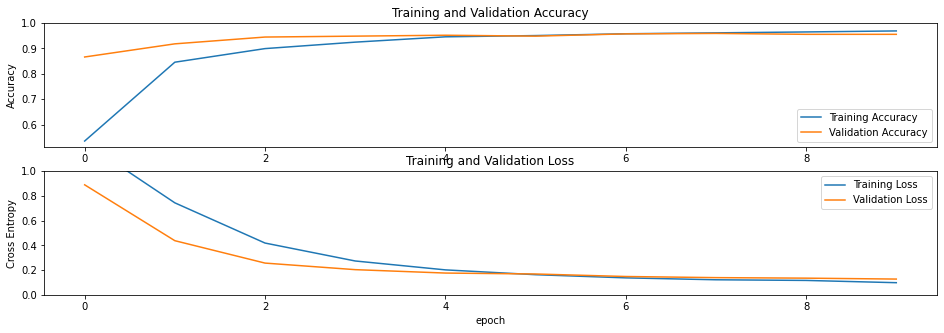

In [88]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(16, 5))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [98]:
test_path = '../input/4-animal-classification/test/test'
test_gen = image_datagen.flow_from_directory(    
    directory=test_path,
    target_size=(240, 240),
    batch_size=32,
    classes=['.'],
    shuffle=False,
)

Found 729 images belonging to 1 classes.


In [99]:
from PIL import Image
predict = []

In [100]:
for i in range(1,730):
    img = Image.open('../input/4-animal-classification/test/test/'+str(i)+'.jpg')
    img = img.resize((240,240))
    c_predict = model.predict(np.asarray(img).reshape(-1,240,240,3))
    predict.append(c_predict)
    if(i % 100 == 0):
        print(i, "Predicted")

100 Predicted
200 Predicted
300 Predicted
400 Predicted
500 Predicted
600 Predicted
700 Predicted


In [102]:
predictions = np.argmax(predict,axis=2)
submission_file = pd.read_csv("../input/4-animal-classification/Sample_submission.csv")
submission_file['Label'] = predictions
submission_file.to_csv('submission.csv', index=False)
submission_file['Label'].value_counts()

2    236
0    193
3    171
1    129
Name: Label, dtype: int64

In [103]:
submission_file

,ID,Label
0,1,1
1,2,0
2,3,2
3,4,3
4,5,2
...,...,...
724,725,1
725,726,2
726,727,2
727,728,2
